Heart disease and malignant neoplasms (cancer) are the two leading causes of death in Tennessee. In this notebooks, we'll see how we can work with a dataset showing number and rate of cancer deaths by county in 2018.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

The data contained in `TN Deaths Malignant Neoplasms - 2018.xlsx` was downloaded from the [Tennessee Department of Health](https://www.tn.gov/health/health-program-areas/statistics/health-data/death-statistics.html).

If you inspect the file, you'll see that the data is divided up into two tables.

We'll read these into two separate dataframes and then combine them using `pd.concat()`.

First, let's see how we can read in the lefthand table. We can use the `read_excel` function and point it to columns A - G.

In [2]:
neoplasms = pd.read_excel('../data/TN Deaths Malignant Neoplasms - 2018.xlsx',
             header = 4,
             usecols = 'A:G'
             )

In [3]:
neoplasms

,COUNTY,NUMBER,RATE,NUMBER.1,RATE.1,NUMBER.2,RATE.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE,14139.0,208.8,12058.0,226.9,1973,170.7
2,ANDERSON,187.0,244.5,179.0,255.3,8,*
3,BEDFORD,111.0,226.3,99.0,232.0,10,*
4,BENTON,71.0,438.7,69.0,449.9,2,*
5,BLEDSOE,30.0,203.2,29.0,216.9,1,*
6,BLOUNT,305.0,232.2,297.0,241.0,7,*
7,BRADLEY,227.0,212.7,221.0,227.8,5,89.9
8,CAMPBELL,107.0,270.3,105.0,272.2,2,*
9,CANNON,47.0,324.7,45.0,325.0,2,*


We don't need the first row and the last few, so we can remove these using `.loc`.

In [4]:
neoplasms = neoplasms.loc[1:48]

In [5]:
neoplasms

,COUNTY,NUMBER,RATE,NUMBER.1,RATE.1,NUMBER.2,RATE.2
1,STATE,14139.0,208.8,12058.0,226.9,1973,170.7
2,ANDERSON,187.0,244.5,179.0,255.3,8,*
3,BEDFORD,111.0,226.3,99.0,232.0,10,*
4,BENTON,71.0,438.7,69.0,449.9,2,*
5,BLEDSOE,30.0,203.2,29.0,216.9,1,*
6,BLOUNT,305.0,232.2,297.0,241.0,7,*
7,BRADLEY,227.0,212.7,221.0,227.8,5,89.9
8,CAMPBELL,107.0,270.3,105.0,272.2,2,*
9,CANNON,47.0,324.7,45.0,325.0,2,*
10,CARROLL,96.0,342.6,93.0,382.7,3,*


Next, let's give the DataFrame better column names.

In [6]:
colnames = ['county', 'total_number', 'total_rate', 'white_number', 'white_rate', 'black_number', 'black_rate']
neoplasms.columns = colnames

In [7]:
neoplasms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 1 to 48
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   county        48 non-null     object 
 1   total_number  48 non-null     float64
 2   total_rate    48 non-null     float64
 3   white_number  48 non-null     float64
 4   white_rate    48 non-null     float64
 5   black_number  48 non-null     object 
 6   black_rate    48 non-null     object 
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


We've got a couple of columns being treated as objects rather than as numeric values. We can fix this using the `pd.to_numeric` function. 

In [8]:
# Convert the total_number column to numeric
neoplasms['total_number'] = pd.to_numeric(neoplasms['total_number'], errors = 'coerce')

# Convert the total_rate column to numeric
neoplasms['total_rate'] = pd.to_numeric(neoplasms['total_rate'], errors = 'coerce')

# Continue this for the remaining numeric columns

/tmp/ipykernel_29717/2346684695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neoplasms['total_number'] = pd.to_numeric(neoplasms['total_number'], errors = 'coerce')
/tmp/ipykernel_29717/2346684695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neoplasms['total_rate'] = pd.to_numeric(neoplasms['total_rate'], errors = 'coerce')


Notice that we are using the same setup for each column, with the only thing changing being the columns name. This is the perfect opportunity to utilize a loop to save typing and avoid copy/paste errors.

In [9]:
for col in ['total_number', 'total_rate', 'white_number', 'white_rate', 'black_number', 'black_rate']:
    neoplasms[col] = pd.to_numeric(neoplasms[col], errors = 'coerce')

/tmp/ipykernel_29717/2311216469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neoplasms[col] = pd.to_numeric(neoplasms[col], errors = 'coerce')


In [10]:
neoplasms.head(2)

,county,total_number,total_rate,white_number,white_rate,black_number,black_rate
1,STATE,14139.0,208.8,12058.0,226.9,1973.0,170.7
2,ANDERSON,187.0,244.5,179.0,255.3,8.0,NaN


Notice that the entire process will be idential for the righthand table with the only piece changing the columns to point the `read_excel` to. This is another opportunity to make use of a for loop.

We'll create a list to store the two resulting DataFrames.

In [11]:
colnames = ['county', 'total_number', 'total_rate', 'white_number', 'white_rate', 'black_number', 'black_rate']

dfs = []

for excel_cols in ['A:G', 'I:O']:
    neoplasms = pd.read_excel('../data/TN Deaths Malignant Neoplasms - 2018.xlsx',
             header = 4,
             usecols = excel_cols
             )
    neoplasms = neoplasms.loc[1:48]
    neoplasms.columns = colnames
    
    for col in ['total_number', 'total_rate', 'white_number', 'white_rate', 'black_number', 'black_rate']:
        neoplasms[col] = pd.to_numeric(neoplasms[col], errors = 'coerce')
        
    dfs.append(neoplasms) 

Finally, we can combine our two dataframes into one using `concat`.

In [12]:
neoplasms = pd.concat(dfs)
neoplasms.head()

,county,total_number,total_rate,white_number,white_rate,black_number,black_rate
1,STATE,14139.0,208.8,12058.0,226.9,1973.0,170.7
2,ANDERSON,187.0,244.5,179.0,255.3,8.0,NaN
3,BEDFORD,111.0,226.3,99.0,232.0,10.0,NaN
4,BENTON,71.0,438.7,69.0,449.9,2.0,NaN
5,BLEDSOE,30.0,203.2,29.0,216.9,1.0,NaN


Now, let's read in our counties shapefiles. This one was obtained from http://www.tngis.org/administrative-boundaries.htm

This creates a geopandas DataFrame, which is like a pandas DataFrame, but has geometry associated with it.

In [13]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [14]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


The `geometry` column contains shapely Polygon or Multipolygon objects giving the boundaries of each county.

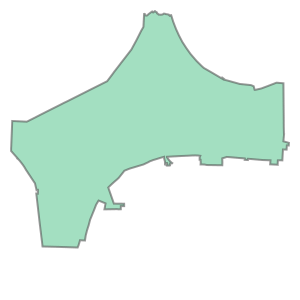

In [15]:
counties.loc[0, 'geometry']

In [16]:
print(counties.loc[0,'geometry'])

POLYGON ((1137985.762302732 344601.6428789578, 1137965.070414974 344714.3860917902, 1137929.600669654 344906.2039496347, 1137898.154866396 345512.6623823774, 1137469.445750057 348995.837174541, 1137435.707956642 349269.1735701271, 1137091.994077147 352061.7139167924, 1136748.37140481 354854.6213887136, 1136636.600959063 355763.4220645485, 1136565.782203062 356369.5481488769, 1136058.004675312 360699.4479536295, 1136009.277738645 361126.5176375521, 1135624.252590057 364489.0496263644, 1135517.175048305 365423.2124561986, 1135414.877024567 366315.3635590593, 1135106.624360228 369005.3322604543, 1134744.459074066 372166.5884051323, 1134707.664200141 372487.3554801308, 1135459.29261814 372472.4450768733, 1135495.093399571 372461.5914240404, 1135498.208878892 372497.5523101155, 1135527.608754484 372868.8652157952, 1135523.078579808 373138.8226811268, 1135535.057230393 373537.5791014506, 1135542.899734396 373854.1578646234, 1135555.788160057 374305.6887857206, 1135540.49586782 374439.0366161

If we call `.plot()` and a GeoDataFrame, it will render a plot using the geometry column.

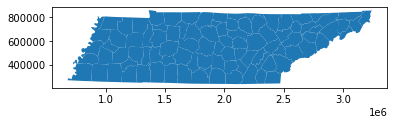

In [17]:
counties.plot();

If we want a larger plot, we can use `plt.subplots()` and set a figsize. When we create our plot, we need to specify that we want it to render on the axes we just created.

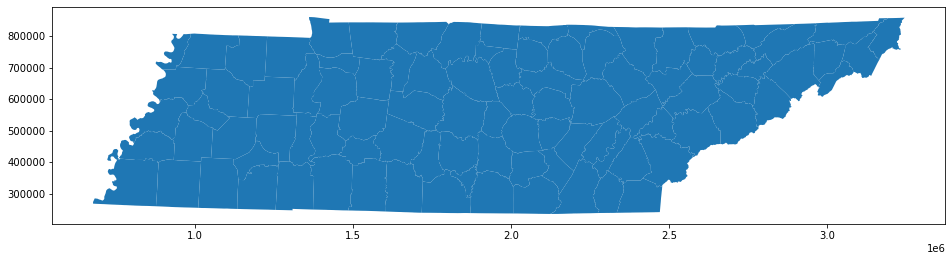

In [18]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

Since the axes are not conveying useful information, we can remove them.

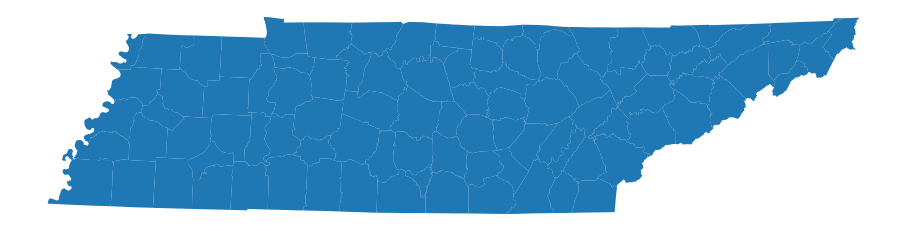

In [19]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

Now, we can merge the geoDataFrame with our neoplasms dataframe.

In [20]:
counties.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."


In [21]:
neoplasms.head(2)

,county,total_number,total_rate,white_number,white_rate,black_number,black_rate
1,STATE,14139.0,208.8,12058.0,226.9,1973.0,170.7
2,ANDERSON,187.0,244.5,179.0,255.3,8.0,NaN


To allow us to merge, we can convert the county names in `counties` to uppercase.

In [22]:
counties['NAME'] = counties['NAME'].str.upper()

In [23]:
counties = pd.merge(left = counties,
                    right = (neoplasms[['county', 'total_rate', 'white_rate', 'black_rate']]
                             .rename(columns = {'county': 'NAME'})
                            )
                   )
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,total_rate,white_rate,black_rate
0,76,CHESTER,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",191.0,205.6,NaN
1,77,WAYNE,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",289.8,309.0,NaN
2,78,TIPTON,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",196.4,205.9,184.1
3,79,HAMILTON,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",199.0,209.7,193.5
4,80,STEWART,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",376.0,390.7,NaN


To color our map based on a column, we can use the `column` argument.

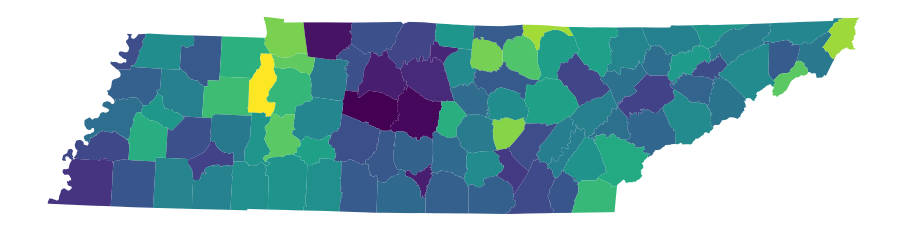

In [24]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'total_rate',
              ax = ax)
ax.axis('off');

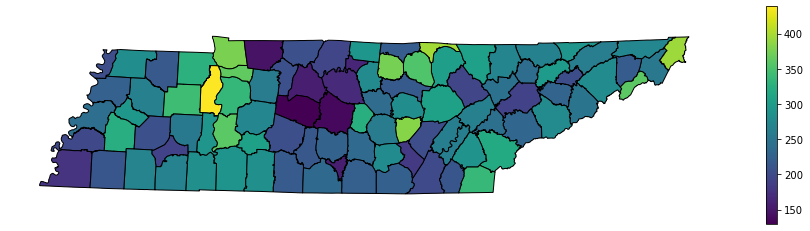

In [25]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'total_rate', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

By default, geopandas will use a continuous colorscale for the choropleth, which lead to a less than optimal map when you have a disproportionately large value.

We can specify a different scheme to use. For example, let's use the [Jenks natural breaks classification method](https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization).

We'll also specify a different colormap using the `cmap` argument. A list of named colormaps is available at https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.

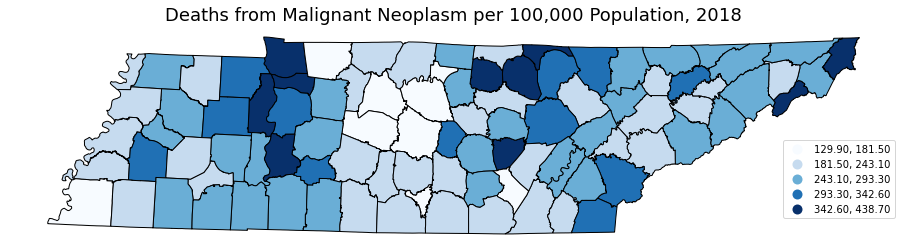

In [26]:
fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'total_rate', 
              edgecolor = 'black', 
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Add a title
plt.title('Deaths from Malignant Neoplasm per 100,000 Population, 2018', fontsize = 18)

ax.axis('off');

**Warning: More advanced code below**

The default legend formatting could be improved. The following cells shows how we can do some advanced formatting to change the legend labels.

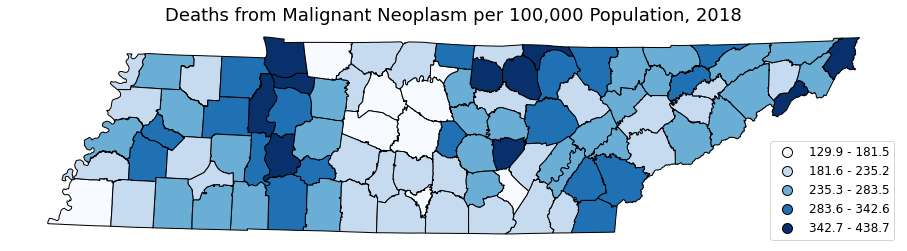

In [27]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(16,4))

p = counties.plot(column = 'total_rate', 
              edgecolor = 'black', 
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

leg = ax.get_legend()

# Adjust the formatting of the legend
labels = []
n = len(leg.get_texts())
for i, lbl in enumerate(leg.get_texts()):
    label_text = lbl.get_text()
    lower = float(label_text.split()[0][:-1])
    upper = float(label_text.split()[1][:-1])
    if i == 0:
        new_text = "{:,.1f}".format(lower) + " - " + "{:,.1f}".format(upper)
    else:
        new_text = "{:,.1f}".format(lower + 0.1) + " - " + "{:,.1f}".format(upper)
        
    labels.append(new_text)

# Adjust the marker appearance
# Extract the old markers and then modify by setting the edgecolor and edgewidth
markers = []
for line in leg.get_lines():
    marker = Line2D([0],[0], marker = 'o', 
                    markersize = line.get_markersize(), 
                    color = line.get_markerfacecolor(),
                    linestyle = 'None',
                    markeredgecolor = 'black',
                    markeredgewidth = 1)
    markers.append(marker)

# Redraw the legend with the new labels and markers
plt.legend(markers, labels, fontsize = 12)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
    
plt.title('Deaths from Malignant Neoplasm per 100,000 Population, 2018', fontsize = 18)

ax.axis('off');